# **IIIT BANGLORE PLANK'D QUANTUM MACHINE LEARNING**

---







## **CNN MODEL**

In [ ]:
!pip install tensorflow # INSTALLING TENSORFLOW

In [ ]:
# Importing Numpy For Numerical operations
import numpy as np  # Numerical operations library

In [ ]:
# Import and Load MNIST Dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize all pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# adds a new axis at the end
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

# one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test,  num_classes=10)


In [ ]:
# importing tensorflow and Keras
import tensorflow as tf
from tensorflow.keras import layers, models


# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.25), # Roatates the image ±25% of 360°
    layers.RandomTranslation(0.1, 0.1), # Shifts image up-down & left-right by 10%
    layers.RandomZoom(0.1), # Zoom 10%
    layers.RandomContrast(0.1) # adjust constrast randomly by 10%
])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, LeakyReLU, ELU
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU, ELU, Softmax
from tensorflow.keras.activations import swish, gelu

# Initialize Sequential model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(16, (3, 3), strides=1, padding='same', input_shape=(28, 28, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(padding='same'))

# Convolutional Block 2
model.add(Conv2D(32, (5, 5), strides=1, padding='same'))
model.add(ELU(alpha=0.4))
model.add(MaxPooling2D(padding='same'))

# Convolutional Block 3
model.add(Conv2D(64, (3, 3), strides=1, padding='same'))
model.add(ELU(alpha=0.1))
model.add(MaxPooling2D(padding='same'))

# Convolutional Block 4
model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation=swish))
model.add(MaxPooling2D(padding='same'))

# Convolutional Block 5
model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation=gelu))
model.add(MaxPooling2D(padding='same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation=swish))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning:

Argument `alpha` is deprecated. Use `negative_slope` instead.



In [ ]:
# Import EarlyStopping callback from Keras
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria to prevent overfitting
early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0005,
    patience=3,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=1,
)

In [ ]:
# Compile the model with optimizer, loss, and evaluation metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture summary
model.summary()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 14, 14, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_18 (ELU)                    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_19 (ELU)                    │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,490 (1.91 MB)

 Trainable params: 500,490 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 146s 149ms/step - accuracy: 0.7972 - loss: 0.5898 - val_accuracy: 0.9776 - val_loss: 0.0732
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 131s 140ms/step - accuracy: 0.9819 - loss: 0.0664 - val_accuracy: 0.9857 - val_loss: 0.0442
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 122s 131ms/step - accuracy: 0.9879 - loss: 0.0440 - val_accuracy: 0.9870 - val_loss: 0.0459
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.9907 - loss: 0.0332 - val_accuracy: 0.9891 - val_loss: 0.0360
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 124s 132ms/step - accuracy: 0.9919 - loss: 0.0285 - val_accuracy: 0.9881 - val_loss: 0.0473
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 122s 130ms/step - accuracy: 0.9928 - loss: 0.0267 - val_accuracy: 0.9898 - val_loss: 0.0384
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 131ms/step - accuracy: 0.9945 - loss: 0.0191 - val_accuracy: 0.9921 - val_loss: 0.0383
Epoch 7: early stopping
Restoring model weights from the end of the best epo

In [ ]:
# Evaluate the trained model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the final accuracy
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9851 - loss: 0.0493
Test Accuracy: 0.9891


In [ ]:
import numpy as np

# Generate predictions (probabilities) for the test dataset
y_pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [ ]:
# Convert predicted probabilities and one-hot encoded labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [ ]:
# Evaluate model performance using classification metrics
from sklearn.metrics import classification_report, accuracy_score

# Print overall accuracy
print("Accuracy:", accuracy_score(y_true, y_pred_classes))

# Print detailed classification report (precision, recall, f1-score per class)
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))


Accuracy: 0.9891

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.97      0.98       958
           7       0.98      1.00      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, roc_auc_score,
    classification_report
)
from sklearn.decomposition import PCA


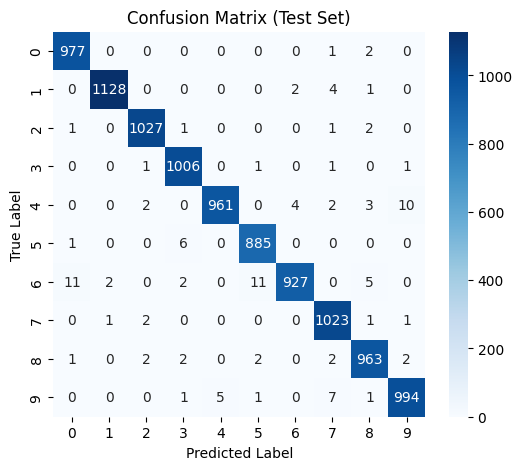

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


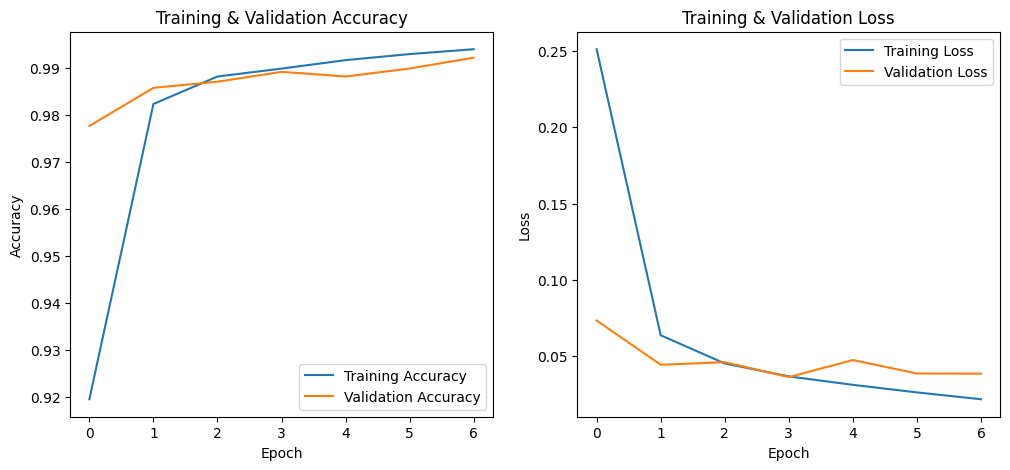

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
print("=== FINAL MODEL PERFORMANCE SUMMARY ===")
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Validation Accuracy: {max(history.history['val_accuracy'])*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

=== FINAL MODEL PERFORMANCE SUMMARY ===
Test Accuracy: 98.91%
Validation Accuracy: 99.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.97      0.98       958
           7       0.98      1.00      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



##**HYBRID MODEL**

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 72.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning:

PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0



Device: cpu | Qubits: 6 | Layers: 3 | Encoding: Amplitude


100%|██████████| 9.91M/9.91M [00:01<00:00, 6.16MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 165kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.74MB/s]



Starting Hybrid VQA Training on 10000 samples...



Epoch 1/50: 100%|██████████| 313/313 [00:38<00:00,  8.16it/s]


Epoch 1: Train Loss=1.6265 | Val Loss=1.2253 | Val Acc=0.8050
[INFO] Saving new best model with Acc: 0.8050 to best_vqa_mnist.pth


Epoch 2/50: 100%|██████████| 313/313 [00:23<00:00, 13.29it/s]


Epoch 2: Train Loss=0.8539 | Val Loss=0.6582 | Val Acc=0.9062
[INFO] Saving new best model with Acc: 0.9062 to best_vqa_mnist.pth


Epoch 3/50: 100%|██████████| 313/313 [00:22<00:00, 14.02it/s]


Epoch 3: Train Loss=0.4792 | Val Loss=0.4402 | Val Acc=0.9475
[INFO] Saving new best model with Acc: 0.9475 to best_vqa_mnist.pth


Epoch 4/50: 100%|██████████| 313/313 [00:21<00:00, 14.74it/s]


Epoch 4: Train Loss=0.3348 | Val Loss=0.3358 | Val Acc=0.9550
[INFO] Saving new best model with Acc: 0.9550 to best_vqa_mnist.pth


Epoch 5/50: 100%|██████████| 313/313 [00:23<00:00, 13.18it/s]


Epoch 5: Train Loss=0.2493 | Val Loss=0.2898 | Val Acc=0.9563
[INFO] Saving new best model with Acc: 0.9563 to best_vqa_mnist.pth


Epoch 6/50: 100%|██████████| 313/313 [00:22<00:00, 14.05it/s]


Epoch 6: Train Loss=0.2006 | Val Loss=0.2574 | Val Acc=0.9525


Epoch 7/50: 100%|██████████| 313/313 [00:21<00:00, 14.44it/s]


Epoch 7: Train Loss=0.1637 | Val Loss=0.2181 | Val Acc=0.9525


Epoch 8/50: 100%|██████████| 313/313 [00:22<00:00, 13.89it/s]


Epoch 8: Train Loss=0.1381 | Val Loss=0.1967 | Val Acc=0.9575
[INFO] Saving new best model with Acc: 0.9575 to best_vqa_mnist.pth


Epoch 9/50: 100%|██████████| 313/313 [00:22<00:00, 13.88it/s]


Epoch 9: Train Loss=0.1171 | Val Loss=0.1676 | Val Acc=0.9625
[INFO] Saving new best model with Acc: 0.9625 to best_vqa_mnist.pth


Epoch 10/50: 100%|██████████| 313/313 [00:22<00:00, 13.96it/s]


Epoch 10: Train Loss=0.1000 | Val Loss=0.1705 | Val Acc=0.9650
[INFO] Saving new best model with Acc: 0.9650 to best_vqa_mnist.pth


Epoch 11/50: 100%|██████████| 313/313 [00:21<00:00, 14.50it/s]


Epoch 11: Train Loss=0.0872 | Val Loss=0.1513 | Val Acc=0.9700
[INFO] Saving new best model with Acc: 0.9700 to best_vqa_mnist.pth


Epoch 12/50: 100%|██████████| 313/313 [00:23<00:00, 13.51it/s]


Epoch 12: Train Loss=0.0757 | Val Loss=0.1655 | Val Acc=0.9625


Epoch 13/50: 100%|██████████| 313/313 [00:22<00:00, 13.92it/s]


Epoch 13: Train Loss=0.0624 | Val Loss=0.1450 | Val Acc=0.9563


Epoch 14/50: 100%|██████████| 313/313 [00:21<00:00, 14.58it/s]


Epoch 14: Train Loss=0.0558 | Val Loss=0.1393 | Val Acc=0.9637


Epoch 15/50: 100%|██████████| 313/313 [00:22<00:00, 13.93it/s]


Epoch 15: Train Loss=0.0485 | Val Loss=0.1336 | Val Acc=0.9663


Epoch 16/50: 100%|██████████| 313/313 [00:22<00:00, 13.84it/s]


Epoch 16: Train Loss=0.0416 | Val Loss=0.1228 | Val Acc=0.9650


Epoch 17/50: 100%|██████████| 313/313 [00:21<00:00, 14.44it/s]


Epoch 17: Train Loss=0.0354 | Val Loss=0.1466 | Val Acc=0.9650


Epoch 18/50: 100%|██████████| 313/313 [00:22<00:00, 13.75it/s]


Epoch 18: Train Loss=0.0302 | Val Loss=0.1170 | Val Acc=0.9700


Epoch 19/50: 100%|██████████| 313/313 [00:22<00:00, 13.92it/s]


Epoch 19: Train Loss=0.0315 | Val Loss=0.1419 | Val Acc=0.9600


Epoch 20/50: 100%|██████████| 313/313 [00:21<00:00, 14.32it/s]


Epoch 20: Train Loss=0.0336 | Val Loss=0.1192 | Val Acc=0.9712
[INFO] Saving new best model with Acc: 0.9712 to best_vqa_mnist.pth


Epoch 21/50: 100%|██████████| 313/313 [00:21<00:00, 14.49it/s]


Epoch 21: Train Loss=0.0218 | Val Loss=0.1285 | Val Acc=0.9688


Epoch 22/50: 100%|██████████| 313/313 [00:22<00:00, 13.89it/s]


Epoch 22: Train Loss=0.0157 | Val Loss=0.1298 | Val Acc=0.9625


Epoch 23/50: 100%|██████████| 313/313 [00:22<00:00, 14.04it/s]


Epoch 23: Train Loss=0.0141 | Val Loss=0.1285 | Val Acc=0.9688

[INFO] Early stopping triggered after 5 epochs with no improvement (Δ < 0.0001).
[INFO] Training stopped by EarlyStopping.

Final Best Validation Accuracy: 0.9712

[INFO] Loaded best model state from best_vqa_mnist.pth for final evaluation.

--- Final Best Model Test Metrics ---
Test Loss: 0.1192
Test Accuracy: 0.9712
Macro Precision: 0.9707
Macro Recall: 0.9707
Macro F1-Score: 0.9706

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       1.00      1.00      1.00        99
           2       0.97      0.97      0.97        87
           3       0.94      0.98      0.96        81
           4       0.99      0.96      0.97        92
           5       0.97      0.95      0.96        75
           6       0.99      0.97      0.98        68
           7       0.97      0.97      0.97        78
           8       0.

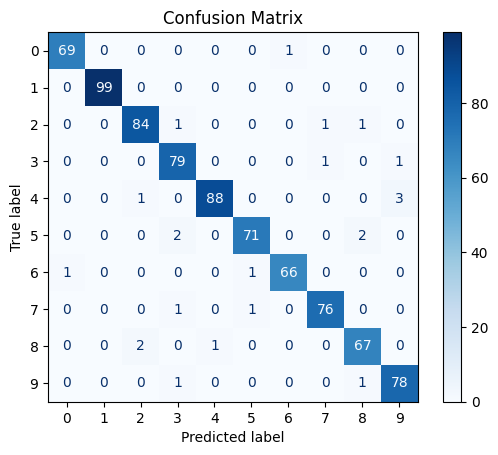

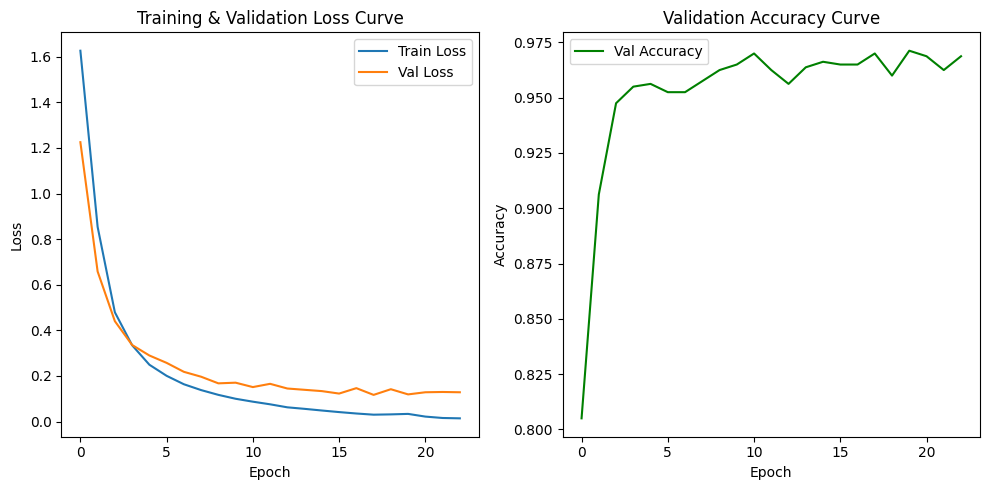

In [ ]:
# PyTorch core modules for building and training deep learning models
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

# PennyLane — Quantum Machine Learning framework for hybrid quantum-classical models
import pennylane as qml
from tqdm import tqdm

# NumPy for numerical computations
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_recall_fscore_support

import os
import sys


torch.manual_seed(42)
np.random.seed(42)

# HYPERPARAMETERS
N_QUBITS = 6
N_LAYERS = 3
BATCH_SIZE = 32
LR = 1e-3
EPOCHS = 50
TRAIN_SIZE = 10000
TEST_SIZE = 800
PATIENCE = 5
MIN_DELTA = 0.0001
MODEL_SAVE_PATH = "best_vqa_mnist.pth"
DATA_DIR = os.path.join(os.getcwd(), "mnist_data")



class EarlyStopping:
    """Stops training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=PATIENCE, min_delta=MIN_DELTA):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float("inf")
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                print(f"\n[INFO] Early stopping triggered after {self.patience} epochs with no improvement (Δ < {self.min_delta}).")
                self.early_stop = True


# Dev setup for PennyLane
dev = qml.device("default.qubit", wires=N_QUBITS)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    """
    VQC with Amplitude Embedding and Strongly Entangling Layers.
    Input size must be 2**N_QUBITS (64 for N_QUBITS=6).
    """
    # Use Amplitude encoding; it's super data-dense, but only works if the classical output is 2^N_QUBITS.
    qml.AmplitudeEmbedding(inputs, wires=range(N_QUBITS), normalize=True)

    # Variational layers for training
    qml.StronglyEntanglingLayers(weights, wires=range(N_QUBITS))

    # Measurement (6 expectation values, one for each qubit)
    return [qml.expval(qml.PauliZ(i)) for i in range(N_QUBITS)]



# Define the expected shape of the variational parameters
weight_shapes = {"weights": (N_LAYERS, N_QUBITS, 3)}

class QuantumLayer(nn.Module):
    """A PyTorch module wrapping the PennyLane QNode."""
    def __init__(self):
        super().__init__()
        # Initialize the TorchLayer with the QNode and parameter shapes
        self.q_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.q_layer(x)


class HybridVQAModel(nn.Module):
    def __init__(self):
        super().__init__()
        # CNN
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16 * 7 * 7, 2**N_QUBITS),
            nn.Tanh()
        )
        self.q_layer = QuantumLayer()
        # Final classical layer:
        self.fc = nn.Linear(N_QUBITS, 10)

    def forward(self, x):
        x = self.cnn(x)
        # Quantum Computation
        x = self.q_layer(x)
        return self.fc(x)



def evaluate(model, dataloader, criterion, device):

    model.eval()
    total_loss, correct = 0.0, 0
    preds_list, labels_list = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            preds_list.extend(preds.cpu().numpy())
            labels_list.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader.dataset)
    accuracy = correct / len(dataloader.dataset)
    return avg_loss, accuracy, preds_list, labels_list


def main():
    """Sets up data, model, training, and runs post-analysis plots."""

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Device: {device} | Qubits: {N_QUBITS} | Layers: {N_LAYERS} | Encoding: Amplitude")

    transform = transforms.Compose([transforms.ToTensor()])
    os.makedirs(DATA_DIR, exist_ok=True)
    train_data = datasets.MNIST(root=DATA_DIR, train=True, download=True, transform=transform)
    test_data = datasets.MNIST(root=DATA_DIR, train=False, download=True, transform=transform)

    train_subset = Subset(train_data, np.arange(TRAIN_SIZE))
    test_subset = Subset(test_data, np.arange(TEST_SIZE))

    train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=BATCH_SIZE)

    model = HybridVQAModel().to(device)
    optimizer = optim.Adam(model.parameters(), lr=LR)
    criterion = nn.CrossEntropyLoss()
    early_stopping = EarlyStopping(patience=PATIENCE, min_delta=MIN_DELTA)

    train_losses, val_losses, val_accs = [], [], []
    best_acc = 0

    print(f"\nStarting Hybrid VQA Training on {TRAIN_SIZE} samples...\n")

    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0.0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
            sys.stdout.flush()
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation Step
        train_loss = running_loss / len(train_loader)
        val_loss, val_acc, preds, labels = evaluate(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f} | Val Loss={val_loss:.4f} | Val Acc={val_acc:.4f}")

        # Early Stopping and Checkpointing
        if val_acc > best_acc:
            best_acc = val_acc
            print(f"[INFO] Saving new best model with Acc: {best_acc:.4f} to {MODEL_SAVE_PATH}")
            torch.save(model.state_dict(), MODEL_SAVE_PATH)

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("[INFO] Training stopped by EarlyStopping.")
            break

    print(f"\nFinal Best Validation Accuracy: {best_acc:.4f}")


    try:
        model.load_state_dict(torch.load(MODEL_SAVE_PATH))
        print(f"\n[INFO] Loaded best model state from {MODEL_SAVE_PATH} for final evaluation.")

        final_loss, final_acc, final_preds, final_labels = evaluate(model, test_loader, criterion, device)

        precision, recall, fscore, _ = precision_recall_fscore_support(final_labels, final_preds, average='macro', zero_division=0)
        overall_accuracy = accuracy_score(final_labels, final_preds)

        print(f"\n--- Final Best Model Test Metrics ---")
        print(f"Test Loss: {final_loss:.4f}")
        print(f"Test Accuracy: {overall_accuracy:.4f}")
        print(f"Macro Precision: {precision:.4f}")
        print(f"Macro Recall: {recall:.4f}")
        print(f"Macro F1-Score: {fscore:.4f}")

    except FileNotFoundError:
        print(f"\n[ERROR] Best model file not found at {MODEL_SAVE_PATH}. Using last epoch's results for metrics.")
        final_preds, final_labels = preds, labels # Fallback to the last epoch's results

    print("\n--- Detailed Classification Report ---")
    print(classification_report(final_labels, final_preds, zero_division=0))

    cm = confusion_matrix(final_labels, final_preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=np.arange(10))
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training & Validation Loss Curve")

    plt.subplot(1, 2, 2)
    plt.plot(val_accs, label="Val Accuracy", color="green")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Validation Accuracy Curve")

    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"\nAn error occurred: {e}")
        print("\nNote: PennyLane VQC models can be computationally intensive and may require significant time, especially if not using a GPU and a simulator (like 'lightning.qubit').")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, roc_auc_score, classification_report
)
from sklearn.decomposition import PCA


Text(45.722222222222214, 0.5, 'True Label')

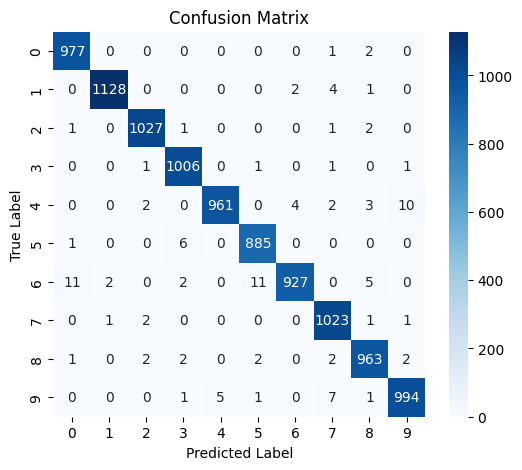

In [ ]:
y_true_classes = np.argmax(y_true, axis=1) if y_true.ndim > 1 else y_true
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(6,5))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


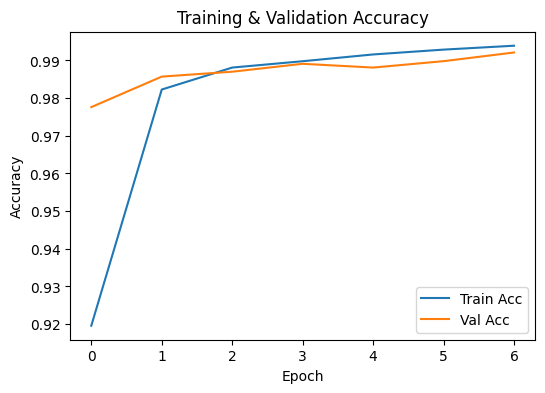

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


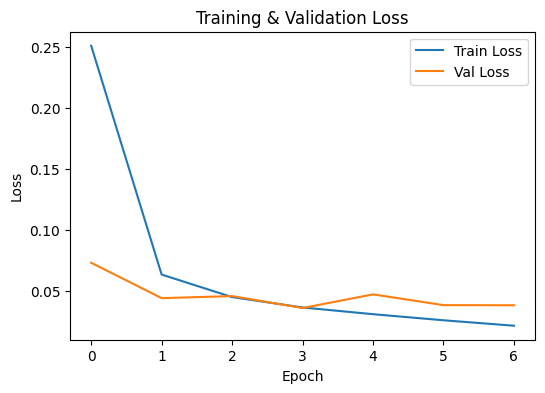

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


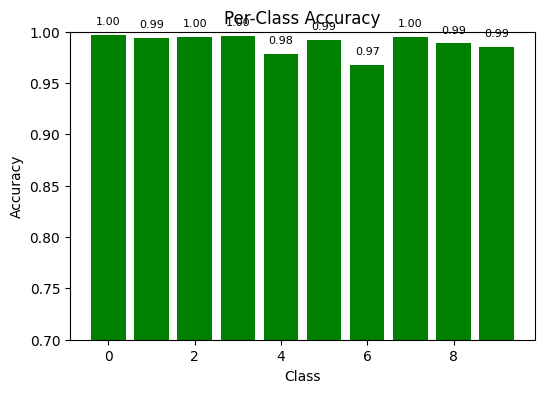

In [ ]:
per_class_acc = []
for i in range(n_classes):
    idx = np.where(y_true_classes == i)
    acc = np.mean(y_pred_classes[idx] == y_true_classes[idx])
    per_class_acc.append(acc)

plt.figure(figsize=(6,4))
plt.bar(range(n_classes), per_class_acc, color='green')
plt.title('Per-Class Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
for i, v in enumerate(per_class_acc):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=8)
plt.show()


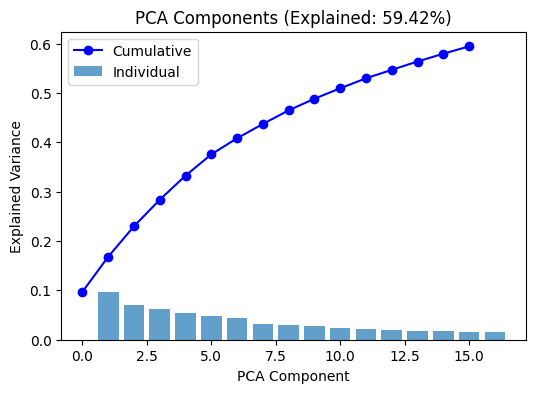

In [ ]:
x_train_flat = x_train.reshape(len(x_train), -1)

pca = PCA(n_components=16)
pca.fit(x_train_flat)

plt.figure(figsize=(6,4))
plt.bar(range(1, 17), pca.explained_variance_ratio_, alpha=0.7, label='Individual')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', label='Cumulative', color='blue')
plt.title(f'PCA Components (Explained: {np.sum(pca.explained_variance_ratio_)*100:.2f}%)')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()
